# Experiment 3: Document at various level for large dataset(COVID-science: non-science : covid-psychology (20 papers))

## 1. Article level

In the file each article is seperated by 'NEW_PAPER' in 'covid-scienc.txt' and 'NEW NEWSPAPER' in 
'covid-non-science'.

In [1]:
#import
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as s
import dataframe_image as dfi
import networkx as nx

C:\ProgramData\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


### covid-science.txt

In [2]:
def load_data(path,file_name,seperator):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    document = ''
    i=0
    with open( os.path.join(path, file_name) ,"r", encoding="utf8") as fin:
        data = fin.read()
        words = data.split()
        fin.seek(0)
        print('Number of words in text file :', len(words))
        for line in fin.readlines():
            text = line.strip()
            i=i+1
            if text !='':
                document = document+text
                if text == seperator:
                    documents_list.append(document)
                    document = ''
        documents_list.append(document)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles,len(words)

In [3]:
document_list,titles,word_count=load_data("","covid-science.txt",'NEW_PAPER')

Number of words in text file : 120257
Total Number of Documents: 20


In [4]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        tokens = [i for i in tokens if len(i)>4]
        print(tokens)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

In [5]:
clean_text=preprocess_data(document_list)

['covidgr', 'dataset', 'covid', 'sdnetmethodology', 'predicting', 'covid', '19based', 'chest', 'imagess', 'tabik', 'gómez', 'martín', 'rodríguez', 'sevillano', 'garcía', 'charte', 'guirado', 'suárez', 'luengo', 'valero', 'gonzález', 'garcía', 'villanova', 'olmedo', 'sánchez', 'herreraabstract', 'currently', 'coronavirus', 'disease', 'covid', 'infectious', 'diseases', 'century', 'diagnosed', 'using', 'testing', 'scans', 'orchest', 'images', 'computed', 'tomography', 'scanners', 'testing', 'available', 'mostmedical', 'centers', 'hence', 'cases', 'imagesbecome', 'effective', 'assisting', 'clinicians', 'making', 'decisions', 'learning', 'neural', 'networkshave', 'great', 'potential', 'building', 'covid', 'triage', 'systemsand', 'detecting', 'covid', 'patients', 'especially', 'patients', 'withlow', 'severity', 'unfortunately', 'current', 'databases', 'allowbuilding', 'systems', 'highly', 'heterogeneousand', 'biased', 'towards', 'severe', 'cases', 'article', 'threefold', 'demystify', 'sensit

In [6]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [7]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    #print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [8]:
# LSA Model
number_of_topics=1
words=word_count
model=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_science =dict(model.show_topic(0, topn=words))##dict and encoding matrix values

In [9]:
dict(model.show_topic(0, topn=5))

{'covid': 0.5195000201940292,
 'imag': 0.381941992495991,
 'model': 0.24414357176753052,
 'dataset': 0.17846130209695232,
 'class': 0.15297059818817832}

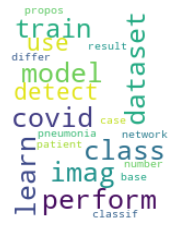

In [10]:
from wordcloud import WordCloud
text = dict(model.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph12.png')

In [11]:
# LSA Model
number_of_topics = 20 #
words = word_count
model = create_gensim_lsa_model(clean_text,number_of_topics,words)

a=pd.DataFrame()

for i in range(number_of_topics):
    words_science =dict(model.show_topic(i, topn=words))
    b=pd.DataFrame(words_science,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled15.png')

cosine-similarity
             covid       imag       model     dataset      class
covid            1   0.114718   0.0699065  -0.0721506   0.275795
imag      0.114718          1   -0.101632    0.179926  0.0364016
model    0.0699065  -0.101632           1  0.00335218   0.049745
dataset -0.0721506   0.179926  0.00335218           1  0.0568222
class     0.275795  0.0364016    0.049745   0.0568222          1


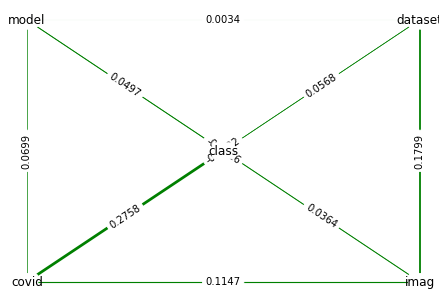

In [12]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.5)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='g',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig15.png')

### covid-non-science.txt

In [13]:
document_list,titles,word_count=load_data("","covid-non-science.txt",'NEW NEWSPAPER')

Number of words in text file : 8713
Total Number of Documents: 20


In [14]:
clean_text=preprocess_data(document_list)

['covid', 'recovery', 'covid', 'realityby', 'reuterspublished', 'updated', '2020by', 'joneslondon', 'reuters', 'world', 'shares', 'inched', 'towards', 'month', 'friday', 'industrial', 'bellwether', 'metal', 'copper', 'longest', 'weekly', 'winning', 'streak', 'nearly', 'three', 'years', 'recovering', 'global', 'nagging', 'coronavirus', 'nerves', 'market', 'rally', 'fuelled', 'record', 'numbers', 'largely', 'blown', 'itself', 'spike', 'covid', 'cases', 'though', 'fastest', 'expansion', 'china', 'services', 'sector', 'decade', 'stimulus', 'ensured', 'optimism', 'remained', 'chinese', 'shares', 'charged', 'their', 'highest', 'level', 'years', 'helping', 'asian', 'indexes', 'month', 'peaks', 'sight', 'european', 'markets', 'stalling', 'early', 'traders', 'surprise', 'currency', 'commodity', 'markets', 'subdued', 'after', 'otherwise', 'strong', 'confidence', 'sensitive', 'stalwarts', 'copper', 'sterling', 'australian', 'dollar', 'which', 'struggled', 'friday', 'think', 'infection', 'rates', 

In [15]:
# LSA Model
number_of_topics=1
words=word_count
model=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_non_science = dict(model.show_topic(0, topn=words))#dict and encoding matrix values


In [16]:
dict(model.show_topic(0,topn=5))

{'test': 0.5525012615032738,
 'peopl': 0.3271103290880662,
 'covid': 0.3235030471482477,
 'symptom': 0.20147297742697412,
 'travel': 0.1590903310651067}

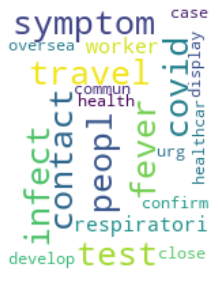

In [17]:
from wordcloud import WordCloud
text = dict(model.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph13.png')

In [18]:
# LSA Model
number_of_topics = 20 #
words = word_count
model = create_gensim_lsa_model(clean_text,number_of_topics,words)

a=pd.DataFrame()

for i in range(number_of_topics):
    words_non_science =dict(model.show_topic(i, topn=words))
    b=pd.DataFrame(words_non_science,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled16.png')

cosine-similarity
              test     peopl      covid    symptom     travel
test             1  0.336661  0.0349857   0.898669   0.716668
peopl     0.336661         1   0.308412   0.423709   0.271003
covid    0.0349857  0.308412          1 -0.0604921 -0.0986359
symptom   0.898669  0.423709 -0.0604921          1   0.755495
travel    0.716668  0.271003 -0.0986359   0.755495          1


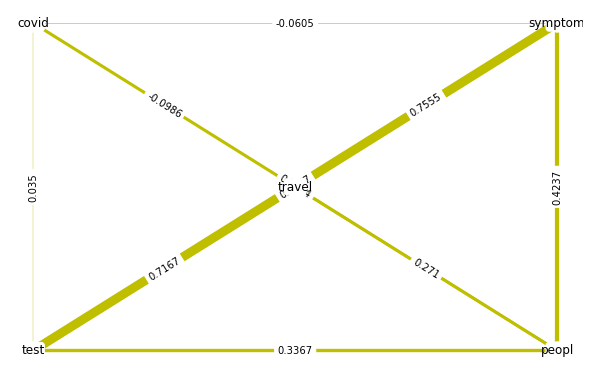

In [19]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.5)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='y',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig16.png')

### covid-psychology.txt

In [20]:
document_list,titles,word_count=load_data("","covid-psychology.txt",'NEW PAPER')

Number of words in text file : 86550
Total Number of Documents: 20


In [21]:
clean_text=preprocess_data(document_list)

['international', 'sociology2021', 'author', '2020article', 'reuse', 'guidelines', 'sagepub', 'journals', 'permissionsdoi', '0268580920948807journals', 'sagepub', 'isspsychology', 'politics', 'ofcovid', 'misinfodemics', 'peoplebelieve', 'misinfodemics', 'sonia', 'mukhtaruniversity', 'management', 'technology', 'lahore', 'pakistanabstractmisinfodemics', 'related', 'covid', 'negatively', 'impacted', 'people', 'lives', 'adversehealth', 'psycho', 'sociopolitical', 'outcomes', 'scientific', 'community', 'seeks', 'communicateevidence', 'based', 'information', 'regarding', 'misplaced', 'preventive', 'strategies', 'misinformed', 'helpseeking', 'behaviors', 'global', 'multifaceted', 'systems', 'secondary', 'emerged', 'effects', 'ofmisinfodemics', 'public', 'published', 'articles', 'pubmed', 'embase', 'google', 'scholar', 'elsevierabout', 'covid', 'related', 'misinfodemics', 'considered', 'reviewed', 'article', 'thisreview', 'examines', 'mechanisms', 'operational', 'structure', 'prevalence', 'pr

In [22]:
# LSA Model
number_of_topics=1
words=word_count
model=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_psychology =dict(model.show_topic(0, topn=words))#dict and encoding matrix values


In [23]:
dict(model.show_topic(0,topn=5))

{'covid': 0.37335649562241346,
 'psycholog': 0.2678599109041968,
 'social': 0.25177978171654863,
 'epidem': 0.19223792506779896,
 'health': 0.18194229083665725}

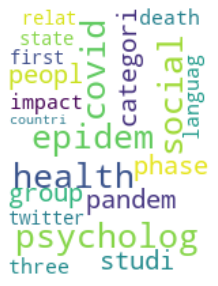

In [24]:
from wordcloud import WordCloud
text = dict(model.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph14.png')

In [25]:
# LSA Model
number_of_topics = 20 #
words = word_count
model = create_gensim_lsa_model(clean_text,number_of_topics,words)

a=pd.DataFrame()

for i in range(number_of_topics):
    words_psychology =dict(model.show_topic(i, topn=words))
    b=pd.DataFrame(words_psychology,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled17.png')

cosine-similarity
               covid psycholog     social     epidem     health
covid              1  0.150447  0.0375207 -0.0516623  0.0207802
psycholog   0.150447         1   0.168003   0.125162   0.380477
social     0.0375207  0.168003          1    0.44382  0.0839178
epidem    -0.0516623  0.125162    0.44382          1  0.0126691
health     0.0207802  0.380477  0.0839178  0.0126691          1


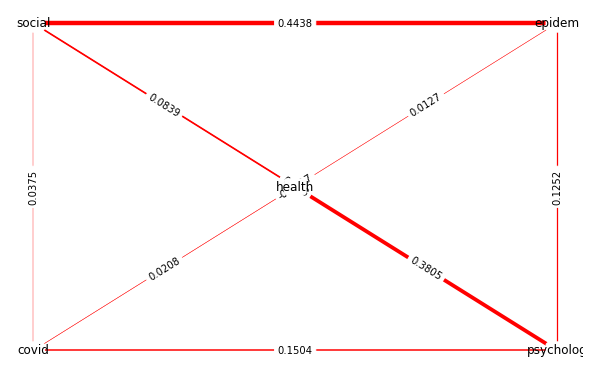

In [26]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.5)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='r',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig17.png')

## 2. 2-3 paragraphs

### covid-science.txt

In [27]:
def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    document = ''
    i=0
    with open( os.path.join(path, file_name) ,"r",encoding="utf8") as fin:
        data = fin.read()
        words = data.split()
        fin.seek(0)
        print('Number of words in text file :', len(words))
        for word in words:
                i=i+1
                document = document+word+' '
                if i == 200:
                    documents_list.append(document)
                    document,i = '',0
                    if len(documents_list) == 2:
                        break
    print("Total Number of Documents:",len(documents_list))
    #titles.append( text[0:min(len(text),100)] )
    return documents_list,titles,len(words)

In [28]:
document_list,titles,word_count=load_data("","covid-science.txt")

Number of words in text file : 120257
Total Number of Documents: 2


In [29]:
clean_text=preprocess_data(document_list)

['covidgr', 'dataset', 'covid', 'sdnet', 'methodology', 'predicting', 'covid', 'based', 'chest', 'images', 'tabik', 'gómez', 'martín', 'rodríguez', 'sevillano', 'garcía', 'charte', 'guirado', 'suárez', 'luengo', 'valero', 'gonzález', 'garcía', 'villanova', 'olmedo', 'sánchez', 'herrera', 'abstract', 'currently', 'coronavirus', 'disease', 'covid', 'infectious', 'diseases', 'century', 'diagnosed', 'using', 'testing', 'scans', 'chest', 'images', 'computed', 'tomography', 'scanners', 'testing', 'available', 'medical', 'centers', 'hence', 'cases', 'images', 'become', 'effective', 'assisting', 'clinicians', 'making', 'decisions', 'learning', 'neural', 'networks', 'great', 'potential', 'building', 'covid', 'triage', 'systems', 'detecting', 'covid', 'patients', 'especially', 'patients', 'severity', 'unfortunately', 'current', 'databases', 'allow', 'building', 'systems', 'highly', 'heterogeneous', 'biased', 'towards', 'severe', 'cases', 'article', 'threefold', 'demystify', 'sensitivities', 'ach

In [30]:
# LSA Model
number_of_topics=1
words=word_count
model=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_science=dict(model.show_topic(0, topn=words))##dict and encoding matrix values

In [31]:
dict(model.show_topic(0, topn=5))

{'support': -0.32899471788278917,
 'granada': -0.24814037209037285,
 'covid': -0.22769581399154276,
 'programm': -0.21932981192185957,
 'research': -0.21932981192185957}

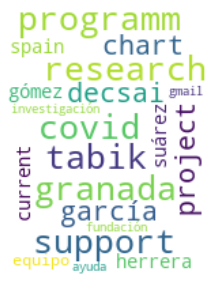

In [32]:
from wordcloud import WordCloud
text = dict(model.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph15.png')

In [33]:
# LSA Model
number_of_topics = 2 #
words = word_count
model = create_gensim_lsa_model(clean_text,number_of_topics,words)

a=pd.DataFrame()

for i in range(number_of_topics):
    words_science =dict(model.show_topic(i, topn=words))
    b=pd.DataFrame(words_science,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled18.png')

cosine-similarity
            support   granada      covid   programm   research
support           1  0.956969 -0.0794645          1          1
granada    0.956969         1   0.213226   0.956969   0.956969
covid    -0.0794645  0.213226          1 -0.0794645 -0.0794645
programm          1  0.956969 -0.0794645          1          1
research          1  0.956969 -0.0794645          1          1


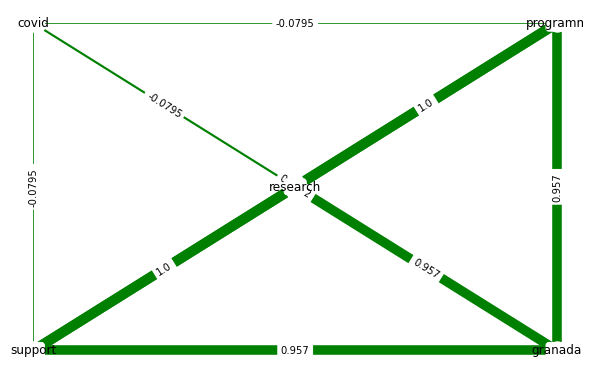

In [34]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.5)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='g',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig18.png')

### covid-non-science.txt

In [35]:
document_list,titles,word_count=load_data("","covid-non-science.txt")

Number of words in text file : 8713
Total Number of Documents: 2


In [36]:
clean_text=preprocess_data(document_list)

['covid', 'recovery', 'covid', 'reality', 'reuters', 'published', 'updated', 'jones', 'london', 'reuters', 'world', 'shares', 'inched', 'towards', 'month', 'friday', 'industrial', 'bellwether', 'metal', 'copper', 'longest', 'weekly', 'winning', 'streak', 'nearly', 'three', 'years', 'recovering', 'global', 'nagging', 'coronavirus', 'nerves', 'market', 'rally', 'fuelled', 'record', 'numbers', 'largely', 'blown', 'itself', 'spike', 'covid', 'cases', 'though', 'fastest', 'expansion', 'china', 'services', 'sector', 'decade', 'stimulus', 'ensured', 'optimism', 'remained', 'chinese', 'shares', 'charged', 'their', 'highest', 'level', 'years', 'helping', 'asian', 'indexes', 'month', 'peaks', 'sight', 'european', 'markets', 'stalling', 'early', 'traders', 'surprise', 'currency', 'commodity', 'markets', 'subdued', 'after', 'otherwise', 'strong', 'confidence', 'sensitive', 'stalwarts', 'copper', 'sterling', 'australian', 'dollar', 'which', 'struggled', 'friday', 'think', 'infection', 'rates', 'fea

In [37]:
# LSA Model
number_of_topics=1
words=word_count
model=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_non_science =dict(model.show_topic(0, topn=words))##dict and encoding matrix values

In [38]:
dict(model.show_topic(0, topn=5))

{'market': 0.29865735592426423,
 'covid': 0.21979867961934063,
 'friday': 0.18596179123202222,
 'infect': 0.15212490284470412,
 'copper': 0.14653245307956086}

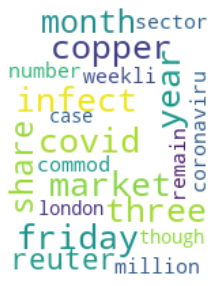

In [39]:
from wordcloud import WordCloud
text = dict(model.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph16.png')

In [40]:
# LSA Model
number_of_topics = 2 #
words = word_count
model = create_gensim_lsa_model(clean_text,number_of_topics,words)

a=pd.DataFrame()

for i in range(number_of_topics):
    words_non_science =dict(model.show_topic(i, topn=words))
    b=pd.DataFrame(words_non_science,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled19.png')

cosine-similarity
          market     covid    friday    infect     three
market         1  0.741138  0.986861  0.813347  0.741138
covid   0.741138         1  0.839872  0.212223         1
friday  0.986861  0.839872         1  0.708661  0.839872
infect  0.813347  0.212223  0.708661         1  0.212223
three   0.741138         1  0.839872  0.212223         1


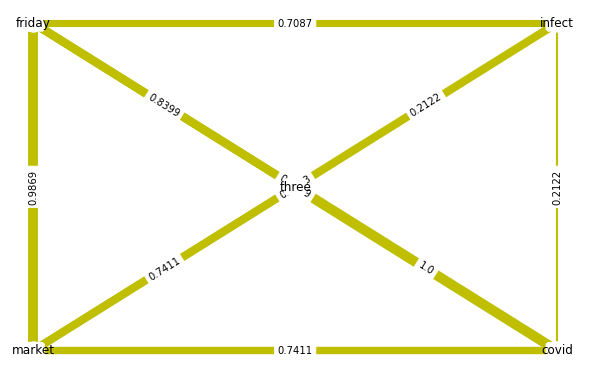

In [41]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.5)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='y',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig19.png')

### covid-psychology.txt

In [42]:
document_list,titles,word_count=load_data("","covid-psychology.txt")

Number of words in text file : 86550
Total Number of Documents: 2


In [43]:
clean_text=preprocess_data(document_list)

['international', 'sociology', 'author', 'article', 'reuse', 'guidelines', 'sagepub', 'journals', 'permissions', '0268580920948807', 'journals', 'sagepub', 'psychology', 'politics', 'covid', 'misinfodemics', 'people', 'believe', 'misinfodemics', 'sonia', 'mukhtar', 'university', 'management', 'technology', 'lahore', 'pakistan', 'abstract', 'misinfodemics', 'related', 'covid', 'negatively', 'impacted', 'people', 'lives', 'adverse', 'health', 'psycho', 'sociopolitical', 'outcomes', 'scientific', 'community', 'seeks', 'communicate', 'evidence', 'based', 'information', 'regarding', 'misplaced', 'preventive', 'strategies', 'misinformed', 'helpseeking', 'behaviors', 'global', 'multifaceted', 'systems', 'secondary', 'emerged', 'effects', 'misinfodemics', 'public', 'published', 'articles', 'pubmed', 'embase', 'google', 'scholar', 'elsevier', 'about', 'covid', 'related', 'misinfodemics', 'considered', 'reviewed', 'article', 'review', 'examines', 'mechanisms', 'operational', 'structure', 'preval

In [44]:
# LSA Model
number_of_topics=1
words=word_count
model=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_psychology =dict(model.show_topic(0, topn=words))##dict and encoding matrix values

In [45]:
dict(model.show_topic(0, topn=5))

{'misinfodem': 0.5033743541941378,
 'covid': 0.36297115033235144,
 'articl': 0.2145925193519745,
 'health': 0.14837863098037715,
 'commun': 0.14837863098037699}

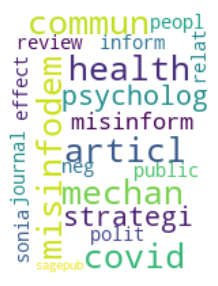

In [46]:
from wordcloud import WordCloud
text = dict(model.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph17.png')

In [47]:
# LSA Model
number_of_topics = 2 #
words = word_count
model = create_gensim_lsa_model(clean_text,number_of_topics,words)

a=pd.DataFrame()

for i in range(number_of_topics):
    words_psychology =dict(model.show_topic(i, topn=words))
    b=pd.DataFrame(words_psychology,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled20.png')

cosine-similarity
           misinfodem     covid    articl    commun    health
misinfodem          1  0.976353  0.993795  0.755596  0.755596
covid        0.976353         1  0.946251  0.879335  0.879335
articl       0.993795  0.946251         1  0.678051  0.678051
commun       0.755596  0.879335  0.678051         1         1
health       0.755596  0.879335  0.678051         1         1


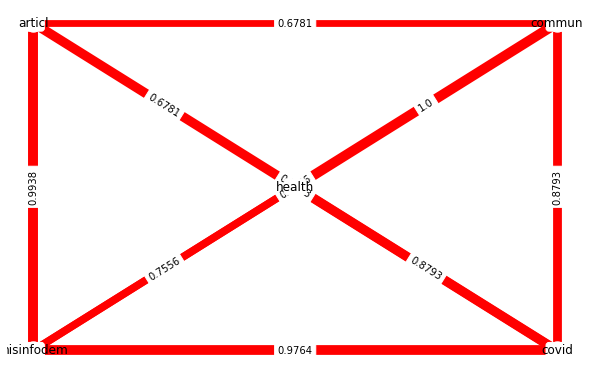

In [48]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.5)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='r',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig20.png')

## Paragraph level

### covid-science.txt

In [49]:
def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r",encoding='UTF8') as fin:
        data = fin.read()
        words = data.split()
        fin.seek(0)
        print('Number of words in text file :', len(words))
        for line in fin.readlines():
            text = line.strip()
            if text !='':
                documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles,len(words)

In [50]:
document_list,titles,word_count=load_data("","covid-science.txt")

Number of words in text file : 120257
Total Number of Documents: 14379


In [51]:
clean_text=preprocess_data(document_list)

['covidgr', 'dataset', 'covid', 'sdnet']
['methodology', 'predicting', 'covid']
['based', 'chest', 'images']
['tabik', 'gómez', 'martín', 'rodríguez', 'sevillano', 'garcía', 'charte']
['guirado', 'suárez', 'luengo', 'valero', 'gonzález', 'garcía', 'villanova']
['olmedo', 'sánchez', 'herrera']
['abstract', 'currently', 'coronavirus', 'disease', 'covid']
['infectious', 'diseases', 'century', 'diagnosed', 'using', 'testing', 'scans']
['chest', 'images', 'computed', 'tomography']
['scanners', 'testing', 'available']
['medical', 'centers', 'hence', 'cases', 'images']
['become', 'effective', 'assisting', 'clinicians', 'making', 'decisions', 'learning', 'neural', 'networks']
['great', 'potential', 'building', 'covid', 'triage', 'systems']
['detecting', 'covid', 'patients', 'especially', 'patients']
['severity', 'unfortunately', 'current', 'databases', 'allow']
['building', 'systems', 'highly', 'heterogeneous']
['biased', 'towards', 'severe', 'cases', 'article', 'threefold', 'demystify', 'sens

In [52]:
# LSA Model
number_of_topics=1
words=word_count
model=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_law =dict(model.show_topic(0, topn=words))##dict and encoding matrix values

In [53]:
dict(model.show_topic(0, topn=5))

{'covid': 0.8353522779598694,
 'imag': 0.3551837787874367,
 'detect': 0.142159270107148,
 'model': 0.126703296390223,
 'dataset': 0.10935397392839374}

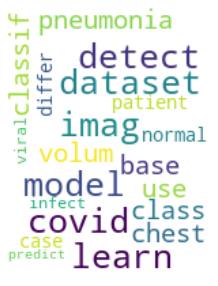

In [54]:
from wordcloud import WordCloud
text = dict(model.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph18.png')

In [55]:
# LSA Model
number_of_topics = 20 #
words = word_count
model = create_gensim_lsa_model(clean_text,number_of_topics,words)

a=pd.DataFrame()

for i in range(number_of_topics):
    words_science =dict(model.show_topic(i, topn=words))
    b=pd.DataFrame(words_science,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled21.png')

cosine-similarity
              covid        imag      detect       model     dataset
covid             1 -0.00295917  0.00497856 -0.00101514  -0.0023715
imag    -0.00295917           1  -0.0098541 -0.00106601 -0.00616562
detect   0.00497856  -0.0098541           1  0.00500058 -0.00537888
model   -0.00101514 -0.00106601  0.00500058           1  1.1342e-06
dataset  -0.0023715 -0.00616562 -0.00537888  1.1342e-06           1


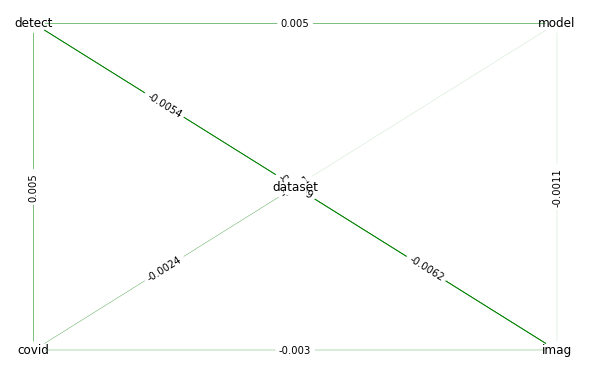

In [56]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.5)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *100  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='g',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig21.png')

### covid-non-science.txt

In [57]:
document_list,titles,word_count=load_data("","covid-non-science.txt")

Number of words in text file : 8713
Total Number of Documents: 387


In [58]:
clean_text=preprocess_data(document_list)

['covid', 'recovery', 'covid', 'reality']
['reuters']
['published', 'updated']
['jones']
['london', 'reuters', 'world', 'shares', 'inched', 'towards', 'month', 'friday', 'industrial', 'bellwether', 'metal', 'copper', 'longest', 'weekly', 'winning', 'streak', 'nearly', 'three', 'years', 'recovering', 'global', 'nagging', 'coronavirus', 'nerves']
['market', 'rally', 'fuelled', 'record', 'numbers', 'largely', 'blown', 'itself', 'spike', 'covid', 'cases', 'though', 'fastest', 'expansion', 'china', 'services', 'sector', 'decade', 'stimulus', 'ensured', 'optimism', 'remained']
['chinese', 'shares', 'charged', 'their', 'highest', 'level', 'years', 'helping', 'asian', 'indexes', 'month', 'peaks', 'sight', 'european', 'markets', 'stalling', 'early', 'traders', 'surprise']
['currency', 'commodity', 'markets', 'subdued', 'after', 'otherwise', 'strong', 'confidence', 'sensitive', 'stalwarts', 'copper', 'sterling', 'australian', 'dollar', 'which', 'struggled', 'friday']
['think', 'infection', 'rate

In [59]:
# LSA Model
number_of_topics=1
words=word_count
model=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_non_science =dict(model.show_topic(0, topn=words))##dict and encoding matrix values

In [60]:
dict(model.show_topic(0, topn=5))

{'trial': -0.46149313704935224,
 'vaccin': -0.38112115175893946,
 'stage': -0.3279125428671372,
 'expect': -0.23283537089944598,
 'dose': -0.19987726824638932}

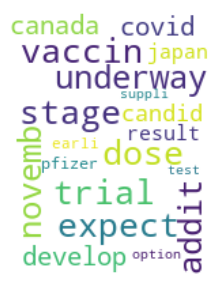

In [61]:
from wordcloud import WordCloud
text = dict(model.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph19.png')

In [62]:
# LSA Model
number_of_topics = 20 #
words = word_count
model = create_gensim_lsa_model(clean_text,number_of_topics,words)

a=pd.DataFrame()

for i in range(number_of_topics):
    words_non_science =dict(model.show_topic(i, topn=words))
    b=pd.DataFrame(words_non_science,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled22.png')

cosine-similarity
           trial    vaccin     stage    expect      dose
trial          1  0.236315  0.967441  0.898226   0.75355
vaccin  0.236315         1  0.254821   0.30158  0.637723
stage   0.967441  0.254821         1  0.951803  0.786306
expect  0.898226   0.30158  0.951803         1  0.789378
dose     0.75355  0.637723  0.786306  0.789378         1


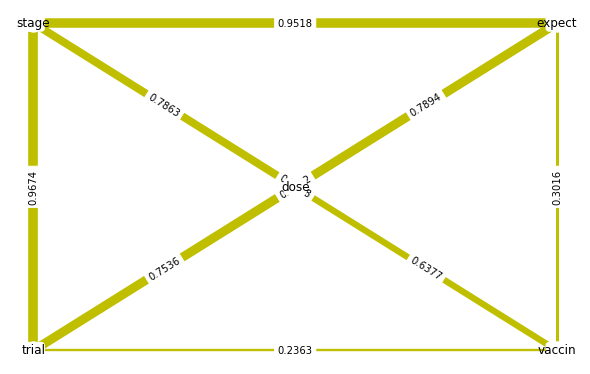

In [63]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.5)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='y',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig22.png')

### covid-psychology.txt

In [64]:
document_list,titles,word_count=load_data("","covid-psychology.txt")

Number of words in text file : 86550
Total Number of Documents: 9007


In [65]:
clean_text=preprocess_data(document_list)

['international', 'sociology']
[]
['author']
['article', 'reuse', 'guidelines']
['sagepub', 'journals', 'permissions']
['0268580920948807']
['journals', 'sagepub']
['psychology', 'politics']
['covid', 'misinfodemics']
['people']
['believe', 'misinfodemics']
['sonia', 'mukhtar']
['university', 'management', 'technology', 'lahore', 'pakistan']
['abstract']
['misinfodemics', 'related', 'covid', 'negatively', 'impacted', 'people', 'lives', 'adverse']
['health', 'psycho', 'sociopolitical', 'outcomes', 'scientific', 'community', 'seeks', 'communicate']
['evidence', 'based', 'information', 'regarding', 'misplaced', 'preventive', 'strategies', 'misinformed', 'helpseeking', 'behaviors', 'global', 'multifaceted', 'systems', 'secondary', 'emerged', 'effects']
['misinfodemics', 'public', 'published', 'articles', 'pubmed', 'embase', 'google', 'scholar', 'elsevier']
['about', 'covid', 'related', 'misinfodemics', 'considered', 'reviewed', 'article']
['review', 'examines', 'mechanisms', 'operational',

In [66]:
# LSA Model
number_of_topics=1
words=word_count
model=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_law =dict(model.show_topic(0, topn=words))##dict and encoding matrix values

In [67]:
dict(model.show_topic(0, topn=5))

{'covid': 0.4452867422219675,
 'pandem': 0.3598116971119661,
 'health': 0.3346022025209638,
 'polici': 0.2629043199247168,
 'impact': 0.21517941736091287}

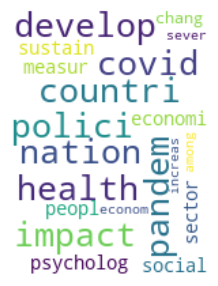

In [68]:
from wordcloud import WordCloud
text = dict(model.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph20.png')

In [69]:
# LSA Model
number_of_topics = 20 #
words = word_count
model = create_gensim_lsa_model(clean_text,number_of_topics,words)

a=pd.DataFrame()

for i in range(number_of_topics):
    words_psychology =dict(model.show_topic(i, topn=words))
    b=pd.DataFrame(words_psychology,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled23.png')

cosine-similarity
              covid       pandem      health      polici      impact
covid             1  0.000608058  -0.0102006  0.00532782    0.039524
pandem  0.000608058            1 -0.00814962   0.0386111 -0.00495451
health   -0.0102006  -0.00814962           1   0.0492558  -0.0412712
polici   0.00532782    0.0386111   0.0492558           1   0.0202923
impact     0.039524  -0.00495451  -0.0412712   0.0202923           1


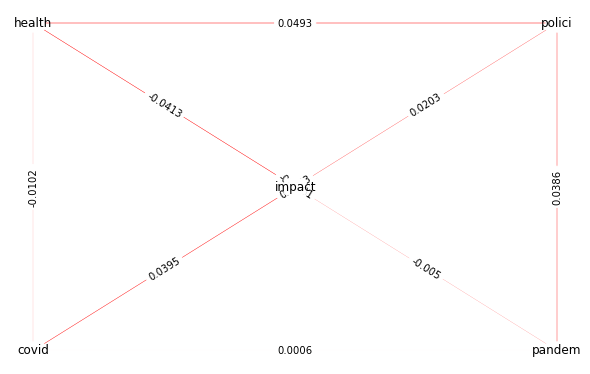

In [70]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.5)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='r',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig23.png')